<a href="https://colab.research.google.com/github/itskutush/Water-Quality-Analysis-using-GNN/blob/main/Water_Quality_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns

In [ ]:
#importing dataset
df = pd.read_csv('Book1.csv')

In [ ]:
df

,STN Code,Year,Monitoring Location,Water Body,State,MinTemp(Celcius),MaxTemp(Celcius),MinDissolved 02(mg/L),MaxDissolved 02(mg/L),Min pH,...,Min BOD (mg/L),Max BOD (mg/L),Min NitrateN + NitriteN(mgL),Max NitrateN + NitriteN(mgL),Min Fecal Coliform(MPN/100ML),Max Fecal Coliform(MPN/100ML),Min Total Coliform(MPN/100ML),Max Total Coliform(MPN/100ML),Min Fecal,Max Fecal
0,4349,2022,"SEA WATER, BAY OF BENGAL, AFTER CONFLUENCE OF ...",MARINE,ANDHRA PRADESH,21.0,30.0,5.2,7.2,7.4,...,1.2,2.5,0.32,1.380,3,7,48.0,120.0,NaN,NaN
1,4352,2022,CONFLUENCE OF MARINE OUTFALL OF M/S MATRIX LAB...,MARINE,ANDHRA PRADESH,25.0,28.0,5.2,6.6,7.7,...,1.4,2.8,0.32,0.880,3,11,39.0,210.0,NaN,NaN
2,4357,2022,"RUSHIKONDA BEACH,VISAKHAPATNAM",BEACH,ANDHRA PRADESH,25.0,29.0,4.8,7.0,7.7,...,1.2,2.9,0.32,1.130,3,14,39.0,150.0,NaN,NaN
3,4361,2022,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKIN...",BEACH,ANDHRA PRADESH,25.0,28.0,4.5,7.9,7.8,...,2.2,2.8,0.42,1.320,3,20,48.0,150.0,NaN,NaN
4,4362,2022,"WATER PORT, KAKINADA (1KM AWAY FROM JETTY)",SEA,ANDHRA PRADESH,25.0,27.0,5.3,8.0,7.4,...,2.2,3.9,0.82,3.320,4,23,75.0,460.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,4387,2020,"SEA WATER, BAY OF BENGAL, KRISHNAPATNAM PORT",MARINE,ANDHRA PRADESH,21.0,25.0,3.8,5.1,7.3,...,2,2.8,0.59,1.200,3,3,64.0,210.0,NaN,NaN
210,2439,2020,PURI,CREEK,ODISHA,21.0,33.0,5.9,8.3,6.8,...,BDL,2.6,BDL,2.039,20,170,78.0,270.0,NaN,NaN
211,2440,2020,PARADEEP,CREEK,ODISHA,22.0,31.0,4.2,7.8,6.8,...,BDL,2.2,BDL,1.284,18,490,18.0,790.0,NaN,NaN
212,2441,2020,GOPALPUR,CREEK,ODISHA,12.0,31.0,6.3,12.5,7.8,...,BDL,1.9,BDL,1.400,18,78,20.0,130.0,NaN,NaN


from matplotlib import pyplot as plt
df['STN Code '].plot(kind='hist', bins=20, title='STN Code ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MinTemp(Celcius)'].plot(kind='hist', bins=20, title='MinTemp(Celcius)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MaxTemp(Celcius)'].plot(kind='hist', bins=20, title='MaxTemp(Celcius)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Water Body').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('State ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='STN Code ', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='MinTemp(Celcius)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MinTemp(Celcius)', y='MaxTemp(Celcius)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MaxTemp(Celcius)', y='MaxDissolved 02(mg/L)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['STN Code ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Water Body')):
  _plot_series(series, series_name, i)
  fig.legend(title='Water Body', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('STN Code ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['STN Code ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State ')):
  _plot_series(series, series_name, i)
  fig.legend(title='State ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('STN Code ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['MinTemp(Celcius)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Water Body')):
  _plot_series(series, series_name, i)
  fig.legend(title='Water Body', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('MinTemp(Celcius)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['MinTemp(Celcius)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State ')):
  _plot_series(series, series_name, i)
  fig.legend(title='State ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('MinTemp(Celcius)')

from matplotlib import pyplot as plt
df['STN Code '].plot(kind='line', figsize=(8, 4), title='STN Code ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MinTemp(Celcius)'].plot(kind='line', figsize=(8, 4), title='MinTemp(Celcius)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MaxTemp(Celcius)'].plot(kind='line', figsize=(8, 4), title='MaxTemp(Celcius)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['State '].value_counts()
    for x_label, grp in df.groupby('Water Body')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Water Body')
_ = plt.ylabel('State ')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Water Body'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='STN Code ', y='Water Body', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['State '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='STN Code ', y='State ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Water Body'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Year', y='Water Body', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['State '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Year', y='State ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

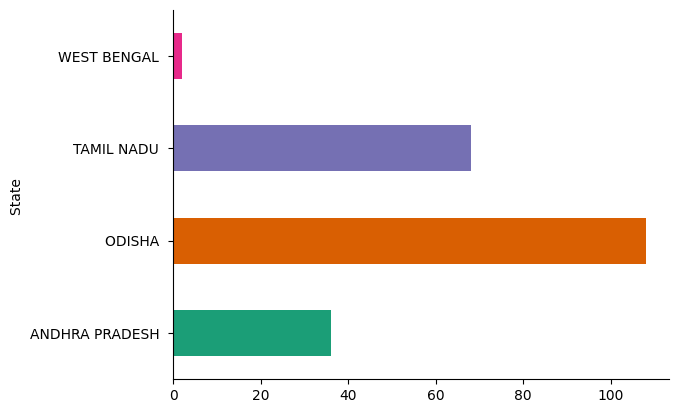

In [ ]:
# Count vs State
df.groupby('State ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

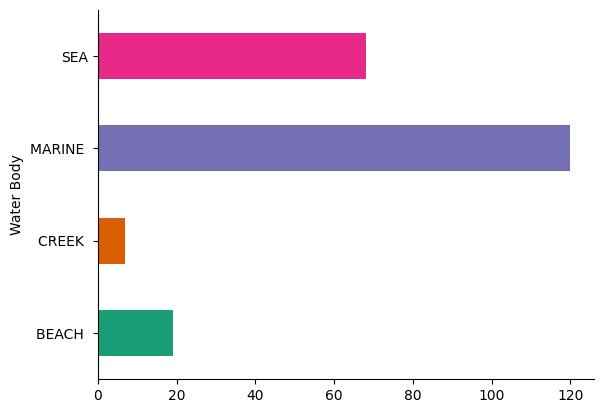

In [ ]:
# Count vs Water Body
df.groupby('Water Body').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

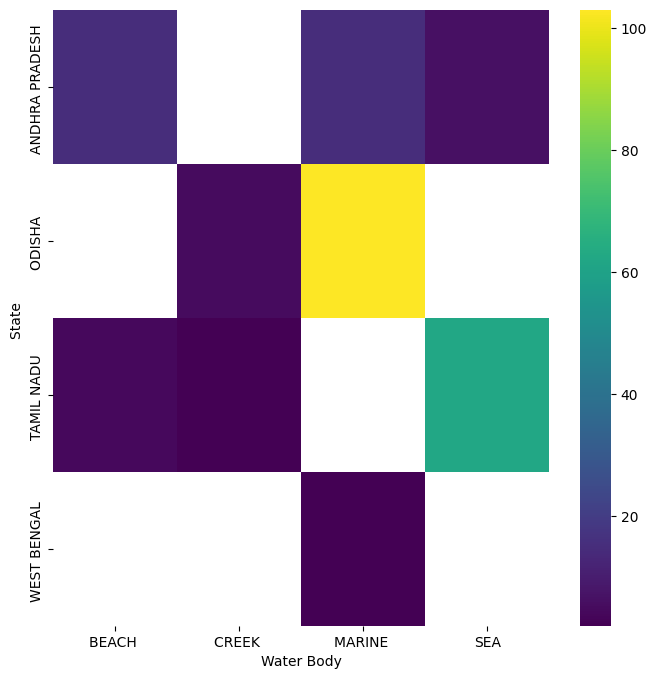

In [ ]:
# 2D Categorical Distribution of Water Body vs State
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['State '].value_counts()
    for x_label, grp in df.groupby('Water Body')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Water Body')
_ = plt.ylabel('State ')

In [ ]:
df.dtypes

STN Code                            int64
Year                                int64
Monitoring Location                object
Water Body                         object
State                              object
MinTemp(Celcius)                  float64
MaxTemp(Celcius)                  float64
MinDissolved 02(mg/L)              object
MaxDissolved 02(mg/L)             float64
Min pH                            float64
Max pH                            float64
Min Conductivity(μmho/cm)         float64
Max Conductivity(μmho/cm)         float64
Min BOD (mg/L)                     object
Max BOD (mg/L)                     object
Min NitrateN + NitriteN(mgL)       object
Max NitrateN + NitriteN(mgL)      float64
Min Fecal Coliform(MPN/100ML)      object
Max Fecal Coliform(MPN/100ML)      object
Min Total Coliform(MPN/100ML)     float64
Max Total Coliform(MPN/100ML)     float64
Min Fecal                         float64
Max Fecal                         float64
dtype: object

In [ ]:
(df['MinDissolved 02(mg/L)'])

0      5.2
1      5.2
2      4.8
3      4.5
4      5.3
      ... 
209    3.8
210    5.9
211    4.2
212    6.3
213    2.2
Name: MinDissolved 02(mg/L), Length: 214, dtype: object

In [ ]:
# Check the column names in your DataFrame
print(df.columns)



Index(['STN Code ', 'Year', 'Monitoring Location ', 'Water Body', 'State ',
       'MinTemp(Celcius)', 'MaxTemp(Celcius)', 'MinDissolved 02(mg/L)',
       'MaxDissolved 02(mg/L)', 'Min pH ', 'Max pH',
       'Min Conductivity(μmho/cm) ', 'Max Conductivity(μmho/cm) ',
       'Min BOD (mg/L) ', 'Max BOD (mg/L) ', 'Min NitrateN + NitriteN(mgL)',
       'Max NitrateN + NitriteN(mgL)', 'Min Fecal Coliform(MPN/100ML) ',
       'Max Fecal Coliform(MPN/100ML) ', 'Min Total Coliform(MPN/100ML)',
       'Max Total Coliform(MPN/100ML)', 'Min Fecal ', 'Max Fecal '],
      dtype='object')


In [ ]:
columns_to_convert = ['MinDissolved 02(mg/L)','Min BOD (mg/L) ', 'Max BOD (mg/L) ', 'Min NitrateN + NitriteN(mgL)','Min Fecal Coliform(MPN/100ML) ',
       'Max Fecal Coliform(MPN/100ML) ']
for column in columns_to_convert:
  df[column] = df[column].replace('BDL','')


In [ ]:
df['MaxDissolved 02(mg/L)']

0       7.2
1       6.6
2       7.0
3       7.9
4       8.0
       ... 
209     5.1
210     8.3
211     7.8
212    12.5
213     6.4
Name: MaxDissolved 02(mg/L), Length: 214, dtype: float64

In [ ]:
df.dtypes

STN Code                            int64
Year                                int64
Monitoring Location                object
Water Body                         object
State                              object
MinTemp(Celcius)                  float64
MaxTemp(Celcius)                  float64
MinDissolved 02(mg/L)              object
MaxDissolved 02(mg/L)             float64
Min pH                            float64
Max pH                            float64
Min Conductivity(μmho/cm)         float64
Max Conductivity(μmho/cm)         float64
Min BOD (mg/L)                     object
Max BOD (mg/L)                     object
Min NitrateN + NitriteN(mgL)       object
Max NitrateN + NitriteN(mgL)      float64
Min Fecal Coliform(MPN/100ML)      object
Max Fecal Coliform(MPN/100ML)      object
Min Total Coliform(MPN/100ML)     float64
Max Total Coliform(MPN/100ML)     float64
Min Fecal                         float64
Max Fecal                         float64
dtype: object

In [ ]:
columns_to_convert = ['Min BOD (mg/L) ', 'Max BOD (mg/L) ', 'Min NitrateN + NitriteN(mgL)','Min Fecal Coliform(MPN/100ML) ',
       'Max Fecal Coliform(MPN/100ML) ']


for column in columns_to_convert:
    # Replace empty strings with NaN
    df[column] = df[column].replace('', np.nan)
    # Convert non-numeric strings to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [ ]:
df.dtypes

STN Code                            int64
Year                                int64
Monitoring Location                object
Water Body                         object
State                              object
MinTemp(Celcius)                  float64
MaxTemp(Celcius)                  float64
MinDissolved 02(mg/L)              object
MaxDissolved 02(mg/L)             float64
Min pH                            float64
Max pH                            float64
Min Conductivity(μmho/cm)         float64
Max Conductivity(μmho/cm)         float64
Min BOD (mg/L)                    float64
Max BOD (mg/L)                    float64
Min NitrateN + NitriteN(mgL)      float64
Max NitrateN + NitriteN(mgL)      float64
Min Fecal Coliform(MPN/100ML)     float64
Max Fecal Coliform(MPN/100ML)     float64
Min Total Coliform(MPN/100ML)     float64
Max Total Coliform(MPN/100ML)     float64
Min Fecal                         float64
Max Fecal                         float64
dtype: object

In [ ]:
df.isnull().sum()

STN Code                            0
Year                                0
Monitoring Location                 0
Water Body                          0
State                               0
MinTemp(Celcius)                   46
MaxTemp(Celcius)                   46
MinDissolved 02(mg/L)               0
MaxDissolved 02(mg/L)               0
Min pH                              0
Max pH                              0
Min Conductivity(μmho/cm)         166
Max Conductivity(μmho/cm)         166
Min BOD (mg/L)                     42
Max BOD (mg/L)                     36
Min NitrateN + NitriteN(mgL)      175
Max NitrateN + NitriteN(mgL)      168
Min Fecal Coliform(MPN/100ML)      31
Max Fecal Coliform(MPN/100ML)      14
Min Total Coliform(MPN/100ML)     161
Max Total Coliform(MPN/100ML)     161
Min Fecal                         199
Max Fecal                         199
dtype: int64

In [ ]:
unique_values = df['Water Body'].unique()
print(unique_values)


['MARINE ' 'BEACH ' 'SEA' 'CREEK ']


In [ ]:
df = df.drop('Min Fecal ',axis =1)

In [ ]:
df.drop('Max Fecal ',axis =1)

,STN Code,Year,Monitoring Location,Water Body,State,MinTemp(Celcius),MaxTemp(Celcius),MinDissolved 02(mg/L),MaxDissolved 02(mg/L),Min pH,...,Min Conductivity(μmho/cm),Max Conductivity(μmho/cm),Min BOD (mg/L),Max BOD (mg/L),Min NitrateN + NitriteN(mgL),Max NitrateN + NitriteN(mgL),Min Fecal Coliform(MPN/100ML),Max Fecal Coliform(MPN/100ML),Min Total Coliform(MPN/100ML),Max Total Coliform(MPN/100ML)
0,4349,2022,"SEA WATER, BAY OF BENGAL, AFTER CONFLUENCE OF ...",MARINE,ANDHRA PRADESH,21.0,30.0,5.2,7.2,7.4,...,13800.0,57300.0,1.2,2.5,0.32,1.380,3.0,7.0,48.0,120.0
1,4352,2022,CONFLUENCE OF MARINE OUTFALL OF M/S MATRIX LAB...,MARINE,ANDHRA PRADESH,25.0,28.0,5.2,6.6,7.7,...,32200.0,56400.0,1.4,2.8,0.32,0.880,3.0,11.0,39.0,210.0
2,4357,2022,"RUSHIKONDA BEACH,VISAKHAPATNAM",BEACH,ANDHRA PRADESH,25.0,29.0,4.8,7.0,7.7,...,31700.0,55700.0,1.2,2.9,0.32,1.130,3.0,14.0,39.0,150.0
3,4361,2022,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKIN...",BEACH,ANDHRA PRADESH,25.0,28.0,4.5,7.9,7.8,...,4800.0,51400.0,2.2,2.8,0.42,1.320,3.0,20.0,48.0,150.0
4,4362,2022,"WATER PORT, KAKINADA (1KM AWAY FROM JETTY)",SEA,ANDHRA PRADESH,25.0,27.0,5.3,8.0,7.4,...,861.0,50300.0,2.2,3.9,0.82,3.320,4.0,23.0,75.0,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,4387,2020,"SEA WATER, BAY OF BENGAL, KRISHNAPATNAM PORT",MARINE,ANDHRA PRADESH,21.0,25.0,3.8,5.1,7.3,...,20100.0,57690.0,2.0,2.8,0.59,1.200,3.0,3.0,64.0,210.0
210,2439,2020,PURI,CREEK,ODISHA,21.0,33.0,5.9,8.3,6.8,...,32970.0,48730.0,NaN,2.6,NaN,2.039,20.0,170.0,78.0,270.0
211,2440,2020,PARADEEP,CREEK,ODISHA,22.0,31.0,4.2,7.8,6.8,...,31550.0,66620.0,NaN,2.2,NaN,1.284,18.0,490.0,18.0,790.0
212,2441,2020,GOPALPUR,CREEK,ODISHA,12.0,31.0,6.3,12.5,7.8,...,30250.0,59050.0,NaN,1.9,NaN,1.400,18.0,78.0,20.0,130.0


## Handling missing values

In [ ]:
df.isnull().sum()

STN Code                            0
Year                                0
Monitoring Location                 0
Water Body                          0
State                               0
MinTemp(Celcius)                   46
MaxTemp(Celcius)                   46
MinDissolved 02(mg/L)               0
MaxDissolved 02(mg/L)               0
Min pH                              0
Max pH                              0
Min Conductivity(μmho/cm)         166
Max Conductivity(μmho/cm)         166
Min BOD (mg/L)                     42
Max BOD (mg/L)                     36
Min NitrateN + NitriteN(mgL)      175
Max NitrateN + NitriteN(mgL)      168
Min Fecal Coliform(MPN/100ML)      31
Max Fecal Coliform(MPN/100ML)      14
Min Total Coliform(MPN/100ML)     161
Max Total Coliform(MPN/100ML)     161
Max Fecal                         199
dtype: int64